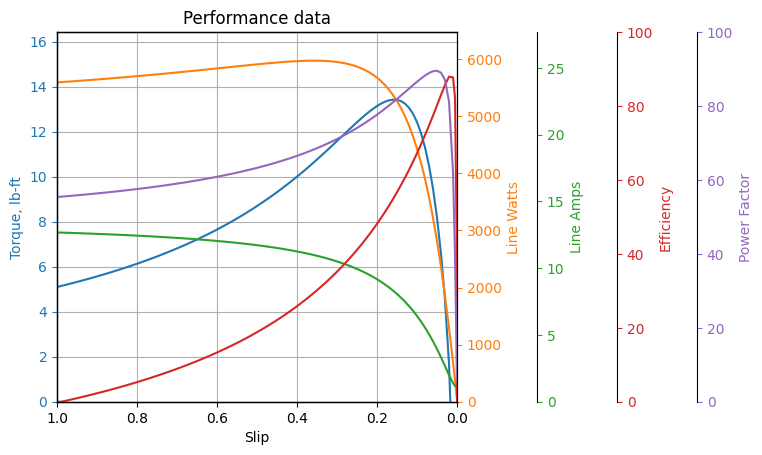

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from polyPhaseCircuit import poly_circuit

motor_data = poly_circuit(
    volts=460/np.sqrt(3),
    ph=3,
    x1=10.4944,
    x2=7.1384,
    xM=229.4160,
    r1=8.8667,
    r2=2.9103,
    rfe=15771.7881,
    f_w=15,
    sync=1800
)

slip = np.array(motor_data['slip'])
torq = np.array(motor_data['torque'])
watts = np.array(motor_data['input'])
amps = np.array(motor_data['current'])
eff = np.array(motor_data['eff'])
pf = np.array(motor_data['pf'])

fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin4 = ax.twinx()

twin2.spines.right.set_position(("axes", 1.2))
twin3.spines.right.set_position(("axes", 1.4))
twin4.spines.right.set_position(("axes", 1.6))

p1, = ax.plot(slip, torq, "C0")
p2, = twin1.plot(slip, watts, "C1")
p3, = twin2.plot(slip, amps, "C2")
p4, = twin3.plot(slip, eff, "C3")
p5, = twin4.plot(slip, pf, "C4")

ax.set(ylim=(0, max(torq)+3), xlabel="Slip", ylabel="Torque, lb-ft")
ax.set_xlim(1, 0)
twin1.set(ylim=(0, max(watts)+500), ylabel="Line Watts")
twin2.set(ylim=(0, max(amps)+15), ylabel="Line Amps")
twin3.set(ylim=(0, 100), ylabel="Efficiency")
twin4.set(ylim=(0, 100), ylabel="Power Factor")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
twin4.yaxis.label.set_color(p5.get_color())

ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())
twin3.tick_params(axis='y', colors=p4.get_color())
twin4.tick_params(axis='y', colors=p5.get_color())

ax.grid()
ax.set_title('Performance data')
plt.show()